data loaded successfully
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

dtasetinfo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

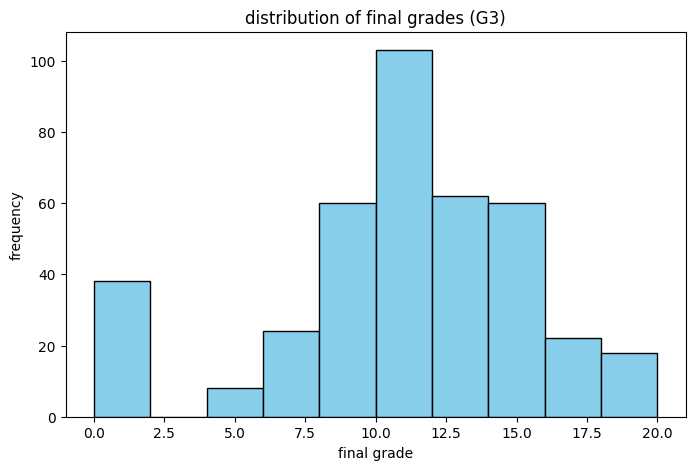

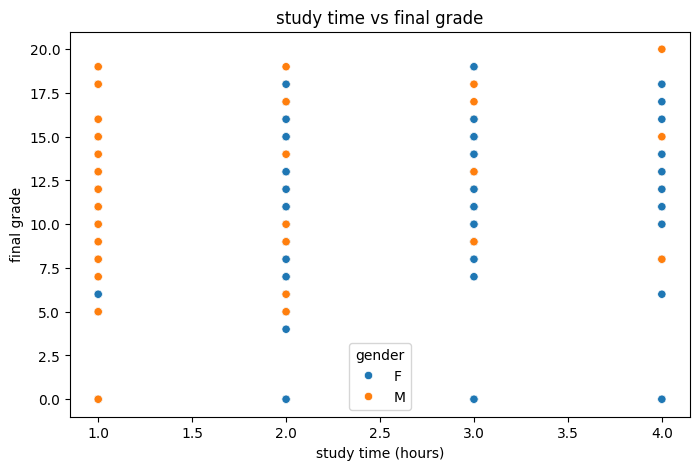

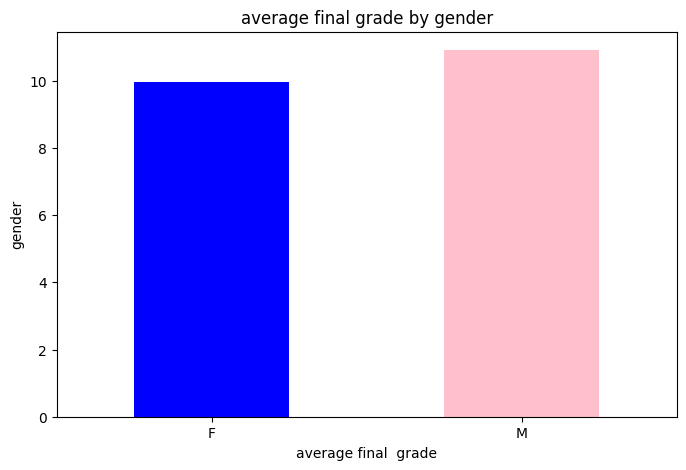

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the data set
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
dataset_path = "student-mat.csv"

#download and load the  dataset
import urllib.request
import zipfile

# download the dataset
urllib.request.urlretrieve(url,"student.zip")

# extract the dataset
with zipfile.ZipFile("student.zip","r") as zip_ref:
    zip_ref.extractall(".")

#load the data in the dataframe
data = pd.read_csv("student-mat.csv",sep=";")
print("data loaded successfully")

# data exploration
print(data.head())
print("\ndtasetinfo:")
print(data.info())

#data cleaning
print("\nmissing values:")
print(data.isnull().sum())

#remove duplicates
data = data.drop_duplicates()

#data analysis question
# what is the average score in math (G3)?
average_score = data['G3'].mean()
print(f"\naverage  maths  score (G3):{average_score:.2f}")

#students scored above 15 in final (g3)?
students_above_15 = len(data[data['G3']>15])
print(f"Number of students scored above  15:{students_above_15}")

# correlation between study time and finale grade
correlation = data['studytime'].corr(data['G3'])
print(f"correlation between study time and final grade: {correlation:.2f}")


# gender with higer average final grades?
average_grade_by_gender = data.groupby('sex')['G3'].mean()
print("\naverage final grade by gender:")
print(average_grade_by_gender)

# data visualization
# histogram of final grades
plt.figure(figsize=(8,5))
plt.hist(data['G3'],bins=10,  color='skyblue',edgecolor='black')
plt.title("distribution of final grades (G3)")
plt.xlabel("final grade")
plt.ylabel("frequency")
plt.show()

#scatter plot of study time vs final grade
plt.figure(figsize=(8,5))
sns.scatterplot(data=data,x='studytime',y='G3',hue='sex')
plt.title("study time vs final grade")
plt.xlabel("study time (hours)")
plt.ylabel("final grade")
plt.legend(title="gender")
plt.show()

#bar chart of average score by gender
plt.figure(figsize=(8,5))
average_grade_by_gender.plot(kind='bar',color=['blue','pink'])
plt.title("average final grade by gender")
plt.xlabel("average final  grade")
plt.ylabel("gender")
plt.xticks(rotation=0)
plt.show()
